In [ ]:
# loading data from UCI Machine Learning Database
import requests
import pandas as pd

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

data_file = "adult_data.csv"
test_file = "adult_test.csv"

column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

response_data = requests.get(data_url)
if response_data.status_code == 200:
    with open(data_file, "wb") as file:
        file.write(response_data.content)
    print(f"adult.data downloaded and saved as {data_file}")
else:
    print(f"Failed to download adult.data. Status code: {response_data.status_code}")

response_test = requests.get(test_url)
if response_test.status_code == 200:
    with open(test_file, "wb") as file:
        file.write(response_test.content)
    print(f"adult.test downloaded and saved as {test_file}")
else:
    print(f"Failed to download adult.test. Status code: {response_test.status_code}")

df_data = pd.read_csv(data_file, header=None, names=column_names, skipinitialspace=True)
df_test = pd.read_csv(test_file, header=None, names=column_names, skiprows=1, skipinitialspace=True)

print("Adult Data (Train):")
print(df_data.head())

print("\nAdult Test:")
print(df_test.head())


adult.data downloaded and saved as adult_data.csv
adult.test downloaded and saved as adult_test.csv
Adult Data (Train):
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country i

In [ ]:
# treating missing values,Label Encoding, Continuous Data Scaling, and Target Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

df_train = pd.read_csv("adult_data.csv", header=None, names=columns, skipinitialspace=True)
df_test = pd.read_csv("adult_test.csv", header=None, names=columns, skiprows=1, skipinitialspace=True)

def treat_missing_values(df):

    df = df.replace(["?", "", " "], pd.NA)

    categorical_columns = df.select_dtypes(include=["object"]).columns
    for col in categorical_columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])

    numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
    for col in numerical_columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())

    return df

df_train = treat_missing_values(df_train)
df_test = treat_missing_values(df_test)

df_train["income"] = df_train["income"].apply(lambda x: 0 if x == "<=50K" else 1)
df_test["income"] = df_test["income"].apply(lambda x: 0 if x == "<=50K." else 1)

X_train, y_train = df_train.drop("income", axis=1), df_train["income"]
X_test, y_test = df_test.drop("income", axis=1), df_test["income"]

label_encoders = {}
for col in X_train.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

df_train_processed = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)
df_test_processed = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis=1)

df_train_processed.to_csv("adult_data_processed.csv", index=False)
df_test_processed.to_csv("adult_test_processed.csv", index=False)

print("Preprocessing completed with Label Encoding, Continuous Data Scaling, and Target Encoding.")
print("Processed datasets saved as 'adult_data_processed.csv' and 'adult_test_processed.csv'.")


Preprocessing completed with Label Encoding, Continuous Data Scaling, and Target Encoding.
Processed datasets saved as 'adult_data_processed.csv' and 'adult_test_processed.csv'.


In [ ]:
#Data sample after missing values,Label Encoding, Continuous Data Scaling, and Target Encoding
import pandas as pd

df_train_cleaned = pd.read_csv("adult_data_processed.csv")
df_test_cleaned = pd.read_csv("adult_test_processed.csv")

df_train_head = df_train_cleaned.head()
df_test_head = df_test_cleaned.head()

df_train_head, df_test_head

(        age  workclass    fnlwgt  education  education-num  marital-status  \
 0  0.030671   2.624298 -1.063611  -0.335437       1.134739        0.921634   
 1  0.837109   1.721100 -1.008707  -0.335437       1.134739       -0.406212   
 2 -0.042642  -0.085296  0.245079   0.181332      -0.420060       -1.734058   
 3  1.057047  -0.085296  0.425801  -2.402511      -1.197459       -0.406212   
 4 -0.775768  -0.085296  1.408176  -0.335437       1.134739       -0.406212   
 
    occupation  relationship      race       sex  capital-gain  capital-loss  \
 0   -1.545256     -0.277805  0.393668  0.703071      0.148453      -0.21666   
 1   -0.790092     -0.900181  0.393668  0.703071     -0.145920      -0.21666   
 2   -0.286649     -0.277805  0.393668  0.703071     -0.145920      -0.21666   
 3   -0.286649     -0.900181 -1.962621  0.703071     -0.145920      -0.21666   
 4    0.720237      2.211698 -1.962621 -1.422331     -0.145920      -0.21666   
 
    hours-per-week  native-country  income

Class Distribution in Training Dataset:
income
0    24720
1     7841
Name: count, dtype: int64


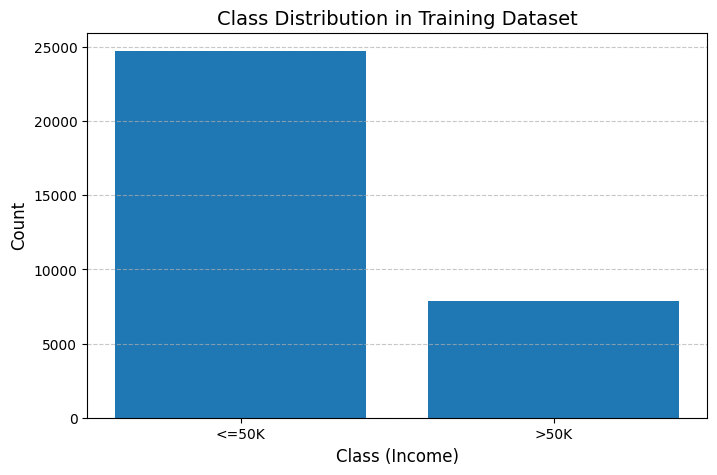

In [ ]:
# Class distribution before SMOTE
import matplotlib.pyplot as plt

df_train_processed = pd.read_csv("adult_data_processed.csv")

target_counts = df_train_processed['income'].value_counts()

print("Class Distribution in Training Dataset:")
print(target_counts)

plt.figure(figsize=(8, 5))
plt.bar(target_counts.index, target_counts.values)
plt.title("Class Distribution in Training Dataset", fontsize=14)
plt.xlabel("Class (Income)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['<=50K', '>50K'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Class distribution after SMOTE
from imblearn.over_sampling import SMOTE
import pandas as pd

df_train_processed = pd.read_csv("adult_data_processed.csv")

X_train = df_train_processed.drop("income", axis=1)
y_train = df_train_processed["income"]

smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

new_class_distribution = pd.Series(y_train_balanced).value_counts()

df_train_balanced = pd.concat([pd.DataFrame(X_train_balanced, columns=X_train.columns),
                                pd.Series(y_train_balanced, name="income")], axis=1)
df_train_balanced.to_csv("adult_data_balanced.csv", index=False)

new_class_distribution


,count
income,
0,24720
1,24720


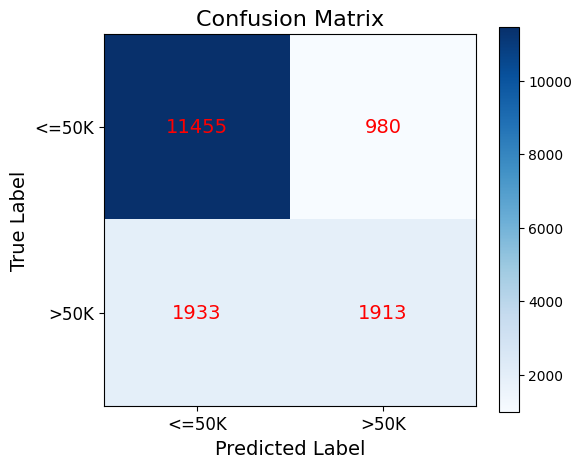

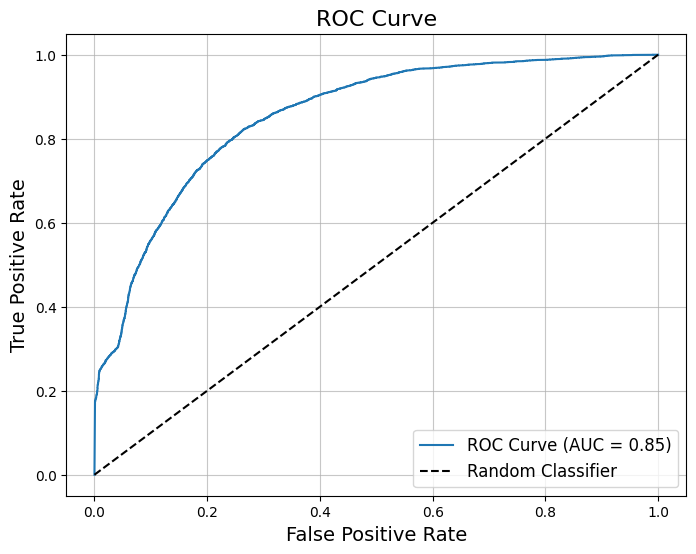

{'Training Accuracy': 0.7116100323624596,
 'Testing Accuracy': 0.8210797862539156,
 'Precision': 0.6612512962322848,
 'Recall': 0.49739989599583984,
 'F1 Score': 0.5677400207745956,
 'Specificity': 0.9211901889827101,
 'ROC AUC': 0.8549263032041186}

In [ ]:
# Naive Bayes Model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_train_balanced = pd.read_csv("adult_data_balanced.csv")

df_test_processed = pd.read_csv("adult_test_processed.csv")

X_train = df_train_balanced.drop("income", axis=1)
y_train = df_train_balanced["income"]
X_test = df_test_processed.drop("income", axis=1)
y_test = df_test_processed["income"]

model = GaussianNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

y_test_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix", fontsize=16)
plt.colorbar()
plt.xticks([0, 1], ["<=50K", ">50K"], fontsize=12)
plt.yticks([0, 1], ["<=50K", ">50K"], fontsize=12)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=14)

plt.show()

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.7)
plt.show()

{
    "Training Accuracy": train_accuracy,
    "Testing Accuracy": test_accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Specificity": specificity,
    "ROC AUC": roc_auc,
}


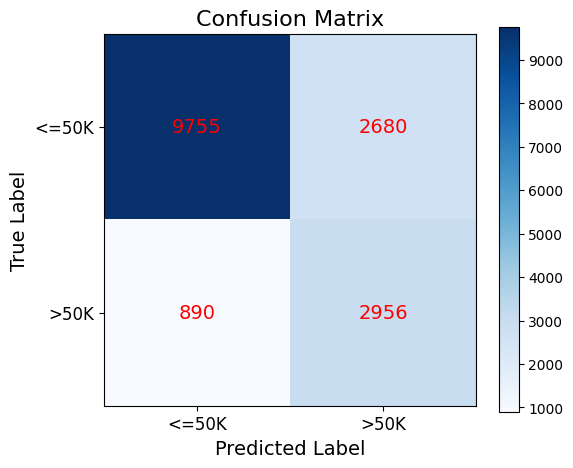

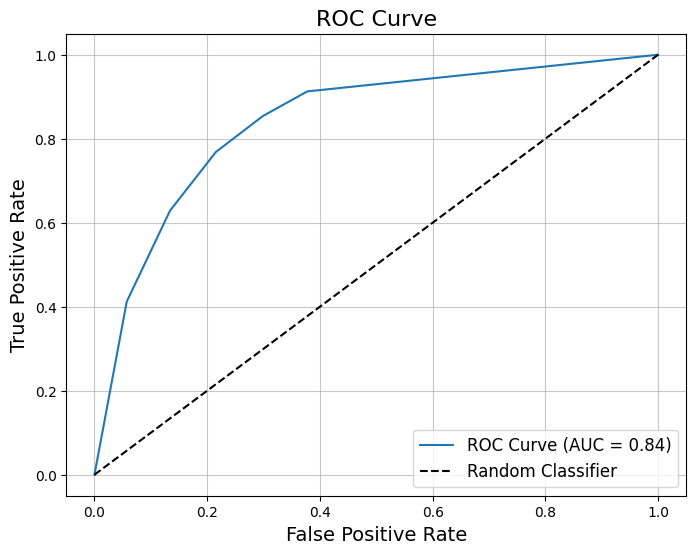

{'Training Accuracy': 0.905542071197411,
 'Testing Accuracy': 0.7807259996314723,
 'Precision': 0.524485450674237,
 'Recall': 0.7685907436297452,
 'F1 Score': 0.6234971524994727,
 'Specificity': 0.7844792923200643,
 'ROC AUC': 0.8410558617760875}

In [ ]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_train_balanced = pd.read_csv("adult_data_balanced.csv")

df_test_processed = pd.read_csv("adult_test_processed.csv")

X_train = df_train_balanced.drop("income", axis=1)
y_train = df_train_balanced["income"]
X_test = df_test_processed.drop("income", axis=1)
y_test = df_test_processed["income"]

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

y_test_prob = knn_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix", fontsize=16)
plt.colorbar()
plt.xticks([0, 1], ["<=50K", ">50K"], fontsize=12)
plt.yticks([0, 1], ["<=50K", ">50K"], fontsize=12)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=14)

plt.show()

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.7)
plt.show()

{
    "Training Accuracy": train_accuracy,
    "Testing Accuracy": test_accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Specificity": specificity,
    "ROC AUC": roc_auc,
}


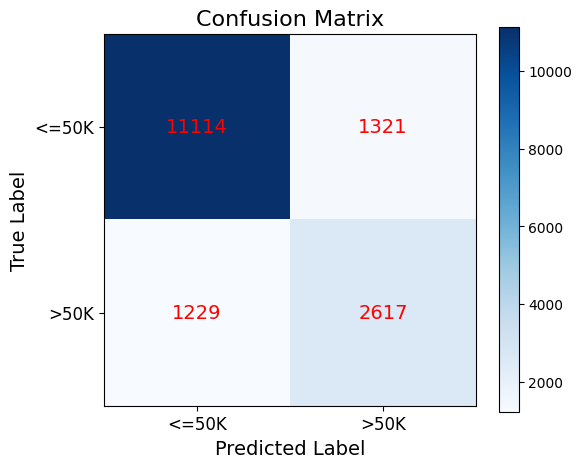

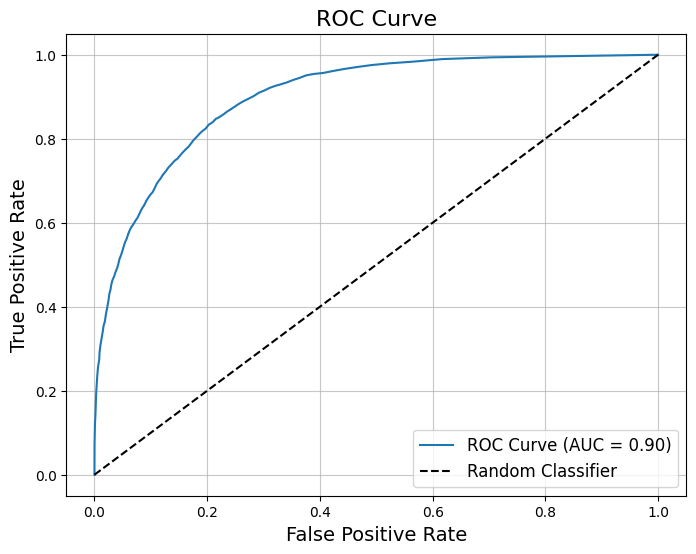

{'Training Accuracy': 0.9999190938511326,
 'Testing Accuracy': 0.8433757140224802,
 'Precision': 0.6645505332656171,
 'Recall': 0.6804472178887155,
 'F1 Score': 0.6724049331963001,
 'Specificity': 0.8937675914756735,
 'ROC AUC': 0.900061463656777}

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_train_balanced = pd.read_csv("adult_data_balanced.csv")

df_test_processed = pd.read_csv("adult_test_processed.csv")

X_train = df_train_balanced.drop("income", axis=1)
y_train = df_train_balanced["income"]
X_test = df_test_processed.drop("income", axis=1)
y_test = df_test_processed["income"]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

y_test_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix", fontsize=16)
plt.colorbar()
plt.xticks([0, 1], ["<=50K", ">50K"], fontsize=12)
plt.yticks([0, 1], ["<=50K", ">50K"], fontsize=12)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=14)

plt.show()

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.7)
plt.show()

{
    "Training Accuracy": train_accuracy,
    "Testing Accuracy": test_accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Specificity": specificity,
    "ROC AUC": roc_auc,
}


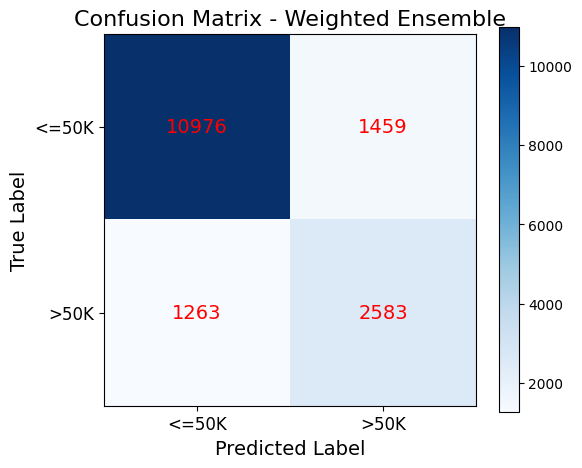

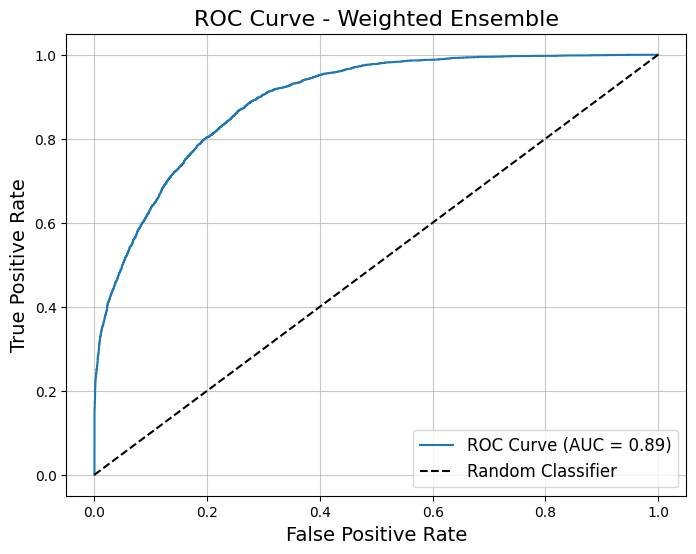

{'Training Accuracy': 0.9598098705501618, 'Testing Accuracy': 0.8328112523800749, 'Precision': 0.6390400791687284, 'Recall': 0.671606864274571, 'F1 Score': 0.6549188640973631, 'Specificity': 0.8826698833936469, 'ROC AUC': 0.8931935299124871}


In [ ]:
#Ensembled model
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the datasets
df_train_balanced = pd.read_csv("adult_data_balanced.csv")
df_test_processed = pd.read_csv("adult_test_processed.csv")

# Split data into features and target
X_train = df_train_balanced.drop("income", axis=1)
y_train = df_train_balanced["income"]
X_test = df_test_processed.drop("income", axis=1)
y_test = df_test_processed["income"]

# Define individual models
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Assign weights based on testing accuracy
nb_weight = 0.82  # Testing accuracy for Naive Bayes
knn_weight = 0.78  # Testing accuracy for KNN
rf_weight = 0.84  # Testing accuracy for Random Forest

# Define the weighted ensemble model
ensemble_model_weighted = VotingClassifier(
    estimators=[
        ("Naive Bayes", nb_model),
        ("KNN", knn_model),
        ("Random Forest", rf_model),
    ],
    voting="soft",
    weights=[nb_weight, knn_weight, rf_weight]
)

# Fit the model
ensemble_model_weighted.fit(X_train, y_train)

# Predictions
y_train_pred_weighted = ensemble_model_weighted.predict(X_train)
y_test_pred_weighted = ensemble_model_weighted.predict(X_test)

# Evaluate performance
train_accuracy_weighted = accuracy_score(y_train, y_train_pred_weighted)
test_accuracy_weighted = accuracy_score(y_test, y_test_pred_weighted)
precision_weighted = precision_score(y_test, y_test_pred_weighted)
recall_weighted = recall_score(y_test, y_test_pred_weighted)
f1_weighted = f1_score(y_test, y_test_pred_weighted)

conf_matrix_weighted = confusion_matrix(y_test, y_test_pred_weighted)
tn, fp, fn, tp = conf_matrix_weighted.ravel()
specificity_weighted = tn / (tn + fp)

y_test_prob_weighted = ensemble_model_weighted.predict_proba(X_test)[:, 1]
roc_auc_weighted = roc_auc_score(y_test, y_test_prob_weighted)

# Confusion matrix visualization
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix_weighted, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Weighted Ensemble", fontsize=16)
plt.colorbar()
plt.xticks([0, 1], ["<=50K", ">50K"], fontsize=12)
plt.yticks([0, 1], ["<=50K", ">50K"], fontsize=12)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix_weighted[i, j], ha="center", va="center", color="red", fontsize=14)

plt.show()

# ROC Curve visualization
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_test_prob_weighted)
plt.figure(figsize=(8, 6))
plt.plot(fpr_weighted, tpr_weighted, label=f"ROC Curve (AUC = {roc_auc_weighted:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.title("ROC Curve - Weighted Ensemble", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.7)
plt.show()

# Output metrics
results = {
    "Training Accuracy": train_accuracy_weighted,
    "Testing Accuracy": test_accuracy_weighted,
    "Precision": precision_weighted,
    "Recall": recall_weighted,
    "F1 Score": f1_weighted,
    "Specificity": specificity_weighted,
    "ROC AUC": roc_auc_weighted,
}

print(results)
